# Alzheimer detection with MRI ( Magnetic resonance imaging )

![](../resources/alzheimer-enfermedad.png) 

## What is Alzheimer? 

Alzheimer's disease is the most common type of dementia. It is a progressive disease beginning with mild memory loss and possibly leading to loss of the ability to carry on a conversation and respond to the environment. Alzheimer's disease involves parts of the brain that control thought, memory, and language.

## What are the warning signs of Alzheimer’s disease?

Alzheimer’s disease is not a normal part of aging. Memory problems are typically one of the first warning signs of Alzheimer’s disease and related dementias.

In addition to memory problems, someone with symptoms of Alzheimer’s disease may experience one or more of the following:

- Memory loss that disrupts daily life, such as getting lost in a familiar place or repeating questions.
- Trouble handling money and paying bills.
- Difficulty completing familiar tasks at home, at work or at leisure.
- Decreased or poor judgment.
- Misplacing things and being unable to retrace steps to find them.
- Changes in mood, personality, or behavior.


## Alezheimer´s stages

There are five stages associated with Alzheimer's disease: preclinical Alzheimer's disease, mild cognitive impairment due to Alzheimer's disease, mild dementia due to Alzheimer's disease, moderate dementia due to Alzheimer's disease and severe dementia due to Alzheimer's disease.

If you want to learn more about Alzheimer, check this website --> 'https://www.alz.org/alzheimer_s_dementia'

# DEFINITION OF THE PROJECT


## Alzheimer´s Dataset

The dataset is organized into 2 folders (train, test) and contains subfolders for each image category (NonDemented/ VeryMildDemented/ MildDemented/ ModerateDemented). There are 5120 images(2.291 NonDemented, 1794 VeryMildDemented, 788 MildDemented, 247 ModerateDemented) in the train set and 1279 images in the test set. 

Source of the Dataset --> 'https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images'

## Goal of the project

This project tries to predict the stage of Alzheimer´s desease working on MRI images. 

For this aim, we are going to use different models of Machine Learning and Deep Learning, such as Logist Regression, Random Forest, CNN... 

# --> CODE 

## -------------    Import the necessary libraries      --------------

In [1]:
# Files and directories

import os
from os import listdir
from os.path import isfile, join

# Json

import json

# DataFrame and Visualization 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Process images

import imageio
import cv2

# Machine learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Deep Learning

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,img_to_array

# Imports from .py files

sys.path.append("../src/utils_")

from utils_.create_df import img_array, concat
from utils_.folders_tb import read_folder, read_data
from utils_.visualization_tb import pie_plot, to_percent, show_train, show_accuracy, show_pred
from utils_.models_tb import cnn, predict, load, save_model, fit

# from utils_.mining_data_tb import data_generator

In [2]:
path = os.getcwd()
route = os.path.dirname

## -------------     Process the data    --------------

### Create DataFrames from the folders 



In [3]:
# Imported from create_df.py

mild = img_array(0, "train", "MildDemented")
moderate = img_array(1, "train", "ModerateDemented")
non_demented = img_array(2, "train", "NonDemented")
very_mild = img_array(3, "train", "VeryMildDemented")

In [4]:
# Show how many images are there in each folder

len_mild = len(mild)
print("len mild:", len_mild)
len_moderate = len(moderate)
print("len moderate:", len_moderate)
len_non_demented = len(non_demented)
print("len non demented: ", len_non_demented)
len_very_mild = len(very_mild)
print("len very mild: ", len_very_mild)
suma = len_mild + len_moderate + len_non_demented + len_very_mild
print("total:", suma)

len mild: 722
len moderate: 700
len non demented:  2083
len very mild:  1490
total: 4995


### Plot the amount of data in each folder

In [5]:
# Imported from visualization_tb.py

# Convert the amount of images in each folder to percentage 

l1 = to_percent(len_mild)
l2 = to_percent(len_moderate)
l3 = to_percent(len_non_demented)
l4 = to_percent(len_very_mild)

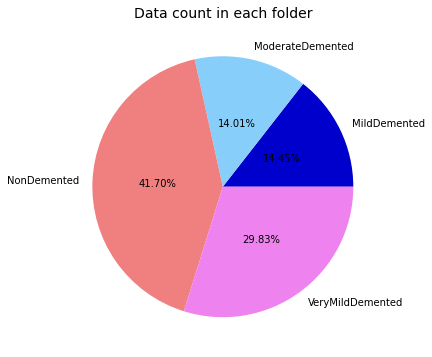

In [6]:
# Imported from visualization_tb.py

# Plot the amount of data in each folder to see the difference

pie_plot(l1, l2, l3, l4, "Data count in each folder")

As the graphic shows, the amount of data in 'NonDemented' and in 'VeryMildDemented' is much higher than data in 'MildDemented' and 'ModerateDemented'

### Data augmentation

1. MODERATE DEMENTED

In [7]:
X_train = np.stack(np.array(moderate["Image"]))
X_train.shape

(700, 180, 180, 3)

In [8]:
# Imported from mining_data_tb.py

# This cell creates new images

# DON´T RUN THIS CELL 

"""data_generator(X_train, "ModerateDemented", len_moderate)"""

'data_generator(X_train, "ModerateDemented", len_moderate)'

2. MILD DEMENTED

In [9]:
X_train = np.stack(np.array(mild["Image"]))
X_train.shape

(722, 180, 180, 3)

In [10]:
# Imported from mining_data_tb.py

# This cell creates new images

# DON´T RUN THIS CELL

"""data_generator(X_train, "MildDemented", len_mild)"""

'data_generator(X_train, "MildDemented", len_mild)'

3. VERY MILD DEMENTED

In [11]:
X_train = np.stack(np.array(very_mild["Image"]))
X_train.shape

(1490, 180, 180, 3)

In [12]:
# Imported from mining_data_tb.py

# This cell creates new images

# DON´T RUN THIS CELL

"""data_generator(X_train, "VeryMildDemented", len_very_mild)"""

'data_generator(X_train, "VeryMildDemented", len_very_mild)'

4. NON DEMENTED

In [13]:
X_train = np.stack(np.array(non_demented["Image"]))
X_train.shape

(2083, 180, 180, 3)

In [14]:
# Imported from mining_data_tb.py

# This cell creates new images

# DON´T RUN THIS CELL

"""data_generator(X_train, "NonDemented", len_non_demented)"""

'data_generator(X_train, "NonDemented", len_non_demented)'

## -------------    Create DataFrames from the new folders      --------------

This is going to be used in:  Some Machine Learning Models, Data augmentation, Flask, Streamlit, SQL...

In [15]:
# Imported from create_df.py

# Create a Df for each folder

mild = img_array(0, "new_train", "MildDemented")
moderate = img_array(1, "new_train", "ModerateDemented")
non_demented = img_array(2, "new_train", "NonDemented")
very_mild = img_array(3, "new_train", "VeryMildDemented")

### - Repeat the process as we did it before to analize the size of data in each folder

In [16]:
# Show how many images are there in each folder

len_mild = len(mild)
print("len mild:", len_mild)
len_moderate = len(moderate)
print("len moderate:", len_moderate)
len_non_demented = len(non_demented)
print("len non demented: ", len_non_demented)
len_very_mild = len(very_mild)
print("len very mild: ", len_very_mild)
suma = len_mild + len_moderate + len_non_demented + len_very_mild
print("total:", suma)

len mild: 2288
len moderate: 1907
len non demented:  2291
len very mild:  1794
total: 8280


In [17]:
# Import from visualization_tb.py

# Convert the amount of images in each folder to percentage 

l1 = to_percent(len_mild)
l2 = to_percent(len_moderate)
l3 = to_percent(len_non_demented)
l4 = to_percent(len_very_mild)

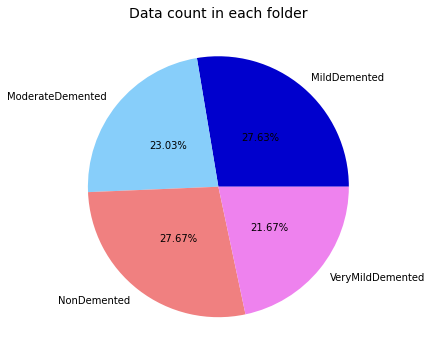

In [18]:
# Imported from visualization_tb.py

# Plot the amount of data in each folder to see the difference

pie_plot(l1, l2, l3, l4, "Data count in each folder")

- Now the amount of data in each folder is more or less equal

In [19]:
# Imported from mining_data_tb.py

# Concat all the Dataframes in one

df = concat(mild, moderate, non_demented, very_mild)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 0 to 1793
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     8280 non-null   object
 1   Label     8280 non-null   int64 
 2   Fullpath  8280 non-null   object
 3   Folder    8280 non-null   object
 4   Size      8280 non-null   object
dtypes: int64(1), object(4)
memory usage: 388.1+ KB


In [20]:
# Save as csv --> easier to work

df.to_csv("../resources/dataframe.csv", index=False)

## -------------     Read folders      --------------

Read images from the folders. The label is the folder`s name 

Class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [21]:
# Imported from folders_tb.py

# Separate in train and val set

train_ds = read_folder("training", "new_train")
val_ds = read_folder("validation", "new_train")

Found 8280 files belonging to 4 classes.
Using 6624 files for training.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
Found 8280 files belonging to 4 classes.
Using 1656 files for validation.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


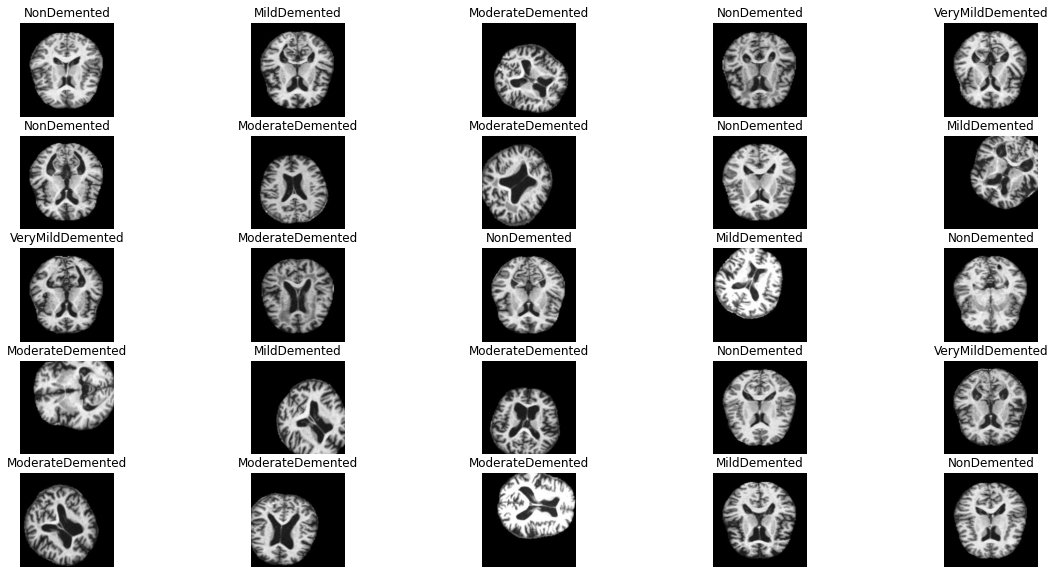

In [22]:
# Imported from visualization_tb.py

# Show some of the images with their labels contained in the train set

show_train(train_ds)

# MACHINE LEARNING MODELS

## 1. CNN (Convolutional Neural Network)

1) Define the model

In [23]:
# Imported from models_tb.py 

model = cnn("accuracy")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 89, 89, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 89, 89, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0

2) Train the model

In [24]:
# Imported from models_tb.py 

# DON´ T RUN THIS CELL

history = fit(model, train_ds, val_ds, 50)

Epoch 1/50
207/207 [==============================] - 379s 2s/step - loss: 69.7824 - accuracy: 0.4449 - val_loss: 671.6964 - val_accuracy: 0.2669
Epoch 2/50
207/207 [==============================] - 375s 2s/step - loss: 3.3495 - accuracy: 0.5655 - val_loss: 438.3853 - val_accuracy: 0.2917
Epoch 3/50
207/207 [==============================] - 384s 2s/step - loss: 1.2742 - accuracy: 0.6481 - val_loss: 396.6733 - val_accuracy: 0.2240
Epoch 4/50
207/207 [==============================] - 382s 2s/step - loss: 1.1053 - accuracy: 0.6786 - val_loss: 265.8178 - val_accuracy: 0.2899
Epoch 5/50
207/207 [==============================] - 383s 2s/step - loss: 1.1746 - accuracy: 0.6846 - val_loss: 283.6532 - val_accuracy: 0.2295
Epoch 6/50
207/207 [==============================] - 391s 2s/step - loss: 0.8899 - accuracy: 0.7243 - val_loss: 239.7531 - val_accuracy: 0.2331
Epoch 7/50
207/207 [==============================] - 387s 2s/step - loss: 0.6909 - accuracy: 0.7517 - val_loss: 208.8754 - val_a

- Plot the accuracy and the val_loss

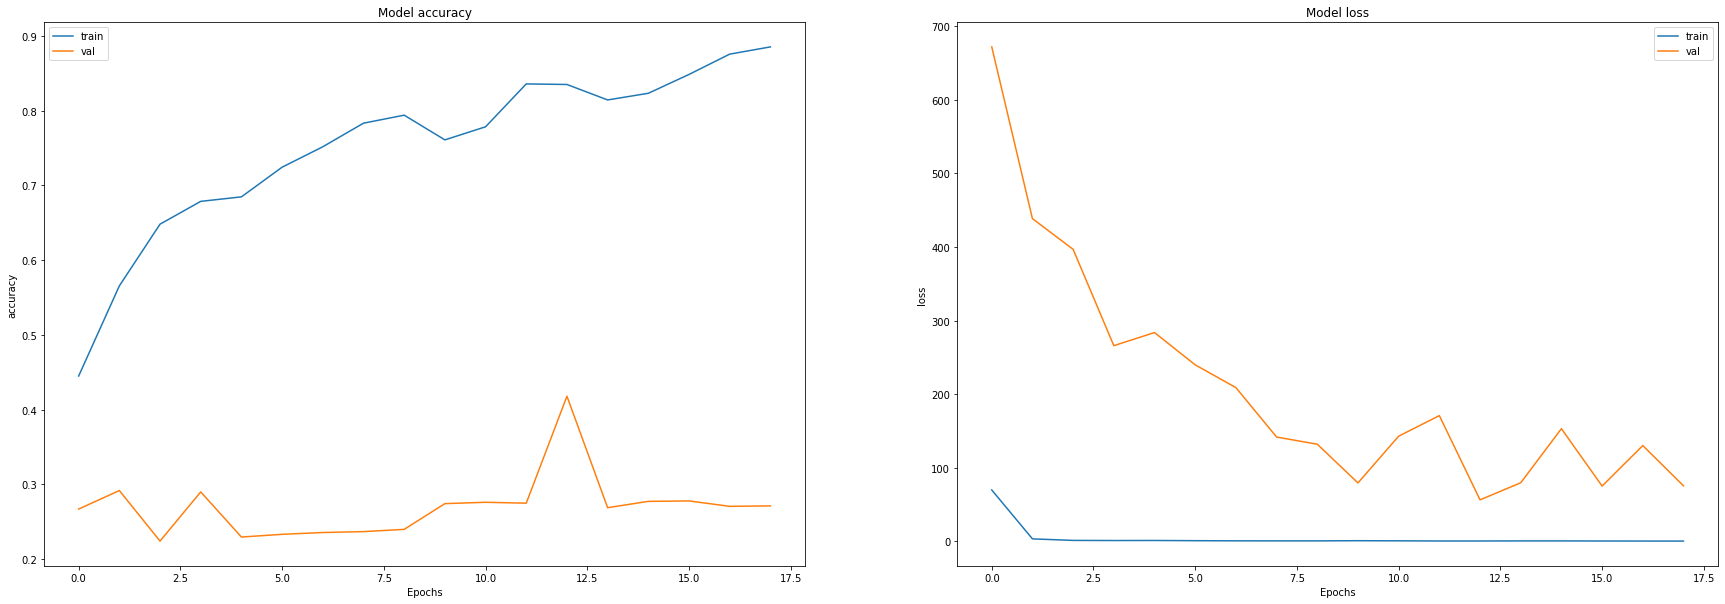

In [25]:
# Imported from visualization_tb.py 

show_accuracy(1, 2, ["accuracy", "loss"], history)

3) Save the model


In [26]:
model.save("../models/cnn8.h5")

4. Read the folders in test one by one

- VeryMildDemented

In [27]:
# Import from folders_tb.py

# We are showing one of the folders of our test set

ruta = route(path) + os.sep + "data" + os.sep + "test" + os.sep + "VeryMildDemented"

x_test = read_data(ruta)

# Process the images as the model requires
x_test = preprocess_input(x_test)
print(x_test.shape)

(448, 180, 180, 3)


5. Load the saved model

In [28]:
new_model = load("../models/cnn7.h5")

6. Predict the new model

In [29]:
preds = new_model.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

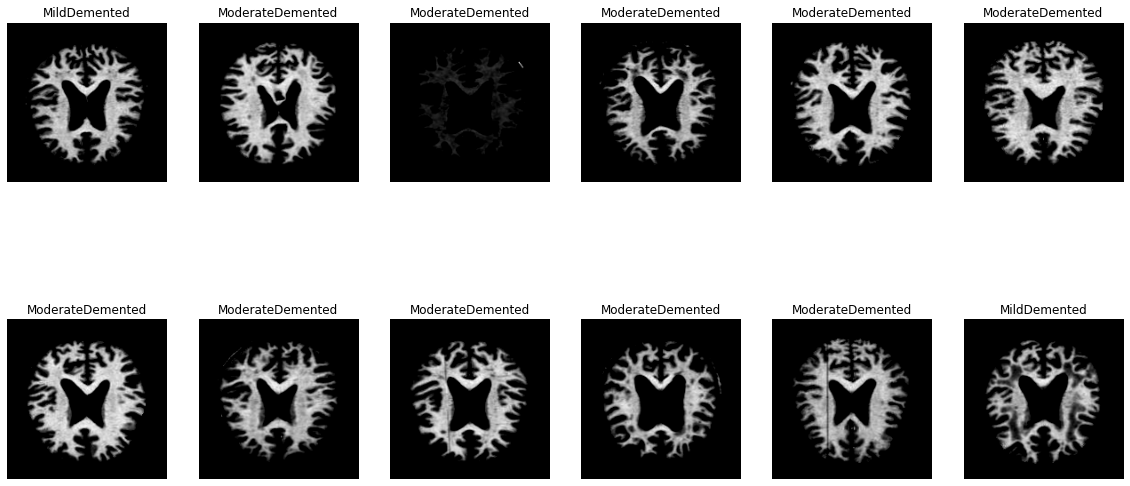

In [30]:
# Imported from visualization_tb.py 

# The images are the x_test set and the tittle of each image the prediction

show_pred(12, 2, 6, x_test, train_ds, preds)

7. Score the model 

In [31]:
# Import from folders_tc.py

test_ds = read_folder("training", "test", batch_size=32)

Found 1404 files belonging to 4 classes.
Using 1124 files for training.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [32]:
# Score our model with the test set

evaluate = new_model.evaluate(test_ds)

36/36 [==============================] - 8s 226ms/step - loss: 10.1984 - accuracy: 0.4315


Model --> cnn7.h5 --> accuracy: 0.4315